In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from math import sqrt 
from math import ceil
from math import log

import numpy as np
from numpy.random import multivariate_normal, randn, uniform

import torch

from scipy.linalg import toeplitz
from scipy.linalg import norm
from scipy.linalg import svdvals
from scipy.linalg import qr
from scipy.optimize import fmin_l_bfgs_b

from algoritms.gradient_descent import gd
from problems.regression import RegPb
from problems.matric_factorization import MatFactPb
from utils.utils import visualize

# Exercice 1

### Question 1.a.

### Question 1.b.

       0 | 5.32e-01 | 1.00e+00
       1 | 5.31e-01 | 5.00e-01
       2 | 5.31e-01 | 3.33e-01
       3 | 5.31e-01 | 2.50e-01
       4 | 5.31e-01 | 2.00e-01
       5 | 5.31e-01 | 1.67e-01
       6 | 5.31e-01 | 1.43e-01
       7 | 5.31e-01 | 1.25e-01
       8 | 5.31e-01 | 1.11e-01
       9 | 5.31e-01 | 1.00e-01


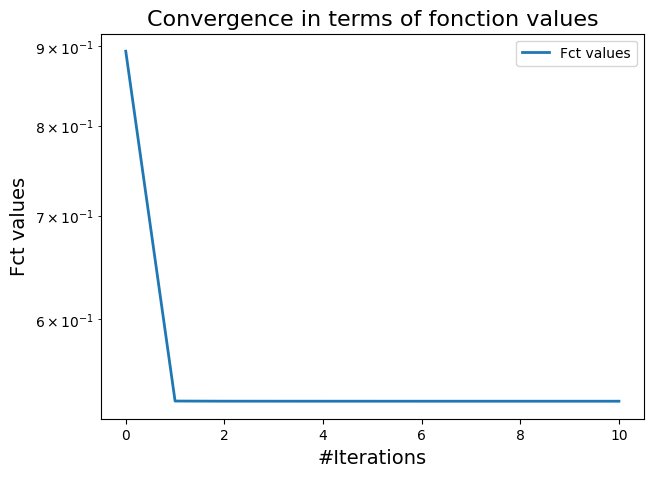

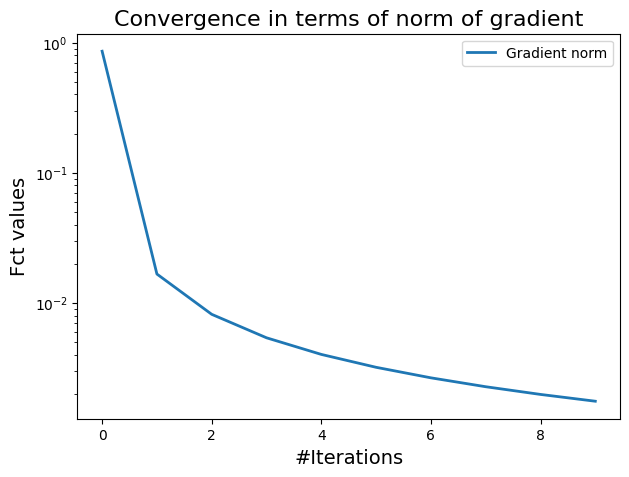

In [7]:
np.random.seed(0)
n = 100
X = np.random.normal(0, 1, n).reshape(n, 1)
y = np.random.normal(0, 1, n).reshape(n, 1)
w0 = np.random.random(1).reshape(1, 1)
pblinreg = RegPb(X=X, y=y, w=w0, lambda_reg=0)

loss_vals = gd(pblinreg, stepchoice=1, init_step=1, n_iter=10, verbose=True)
visualize(data={"Fct values": loss_vals}, title="fonction values")
visualize(data={"Gradient norm": pblinreg.g_norm_list}, title="norm of gradient")

### Question 2.a.

### Question 2.b.

       0 | 4.39e+03 | 5.00e-01
       1 | 2.47e+01 | 6.25e-02
       2 | 1.30e+01 | 1.85e-02
       3 | 1.02e+01 | 7.81e-03
       4 | 9.02e+00 | 4.00e-03
       5 | 8.41e+00 | 2.31e-03
       6 | 8.05e+00 | 1.46e-03
       7 | 7.82e+00 | 9.77e-04
       8 | 7.66e+00 | 6.86e-04
       9 | 7.55e+00 | 5.00e-04
      10 | 7.47e+00 | 3.76e-04
      11 | 7.40e+00 | 2.89e-04
      12 | 7.35e+00 | 2.28e-04
      13 | 7.31e+00 | 1.82e-04
      14 | 7.28e+00 | 1.48e-04
      15 | 7.25e+00 | 1.22e-04
      16 | 7.23e+00 | 1.02e-04
      17 | 7.21e+00 | 8.57e-05
      18 | 7.20e+00 | 7.29e-05
      19 | 7.19e+00 | 6.25e-05


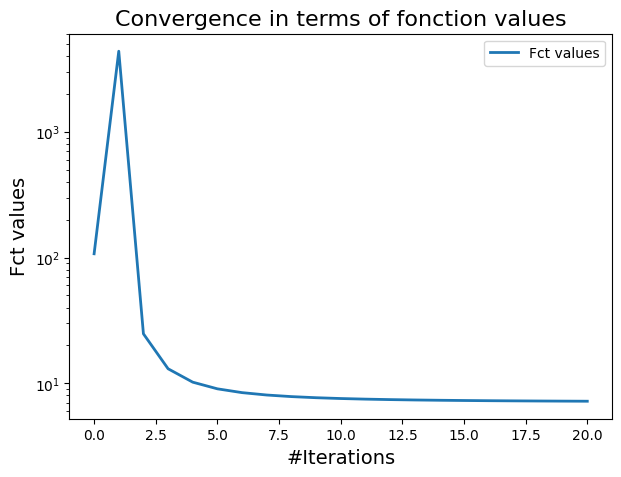

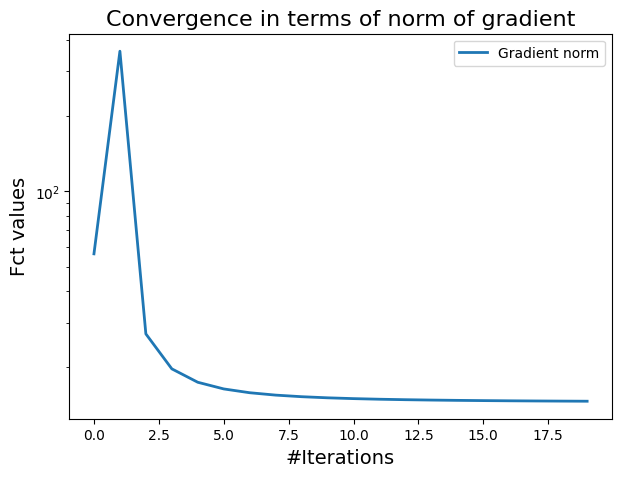

In [14]:
np.random.seed(0)
n = 10
X = np.random.normal(0, 1, n).reshape(1, n)
y = np.random.normal(0, 1, n).reshape(1, n)
W0 = np.random.normal(0, 1, (n, n))
pblinreg = RegPb(X=X, y=y, w=W0, lambda_reg=0)

loss_vals = gd(pblinreg, stepchoice=3, init_step=0.5, n_iter=20, verbose=True)
visualize(data={"Fct values": loss_vals}, title="fonction values")
visualize(data={"Gradient norm": pblinreg.g_norm_list}, title="norm of gradient")

# Exercice 2

## Question 3.a.

       0 | 1.27e+00 | 1.00e+00
       1 | 1.01e+00 | 7.07e-01
       2 | 8.85e-01 | 5.77e-01
       3 | 8.09e-01 | 5.00e-01
       4 | 7.57e-01 | 4.47e-01
       5 | 7.19e-01 | 4.08e-01
       6 | 6.90e-01 | 3.78e-01
       7 | 6.67e-01 | 3.54e-01
       8 | 6.48e-01 | 3.33e-01
       9 | 6.32e-01 | 3.16e-01
      10 | 6.19e-01 | 3.02e-01
      11 | 6.08e-01 | 2.89e-01
      12 | 5.98e-01 | 2.77e-01
      13 | 5.89e-01 | 2.67e-01
      14 | 5.81e-01 | 2.58e-01
      15 | 5.74e-01 | 2.50e-01
      16 | 5.68e-01 | 2.43e-01
      17 | 5.62e-01 | 2.36e-01
      18 | 5.57e-01 | 2.29e-01
      19 | 5.52e-01 | 2.24e-01
      20 | 5.47e-01 | 2.18e-01
      21 | 5.43e-01 | 2.13e-01
      22 | 5.40e-01 | 2.09e-01
      23 | 5.36e-01 | 2.04e-01
      24 | 5.33e-01 | 2.00e-01
      25 | 5.30e-01 | 1.96e-01
      26 | 5.27e-01 | 1.92e-01
      27 | 5.24e-01 | 1.89e-01
      28 | 5.21e-01 | 1.86e-01
      29 | 5.19e-01 | 1.83e-01
      30 | 5.17e-01 | 1.80e-01
      31 | 5.14e-01 | 1.77e-01
      32

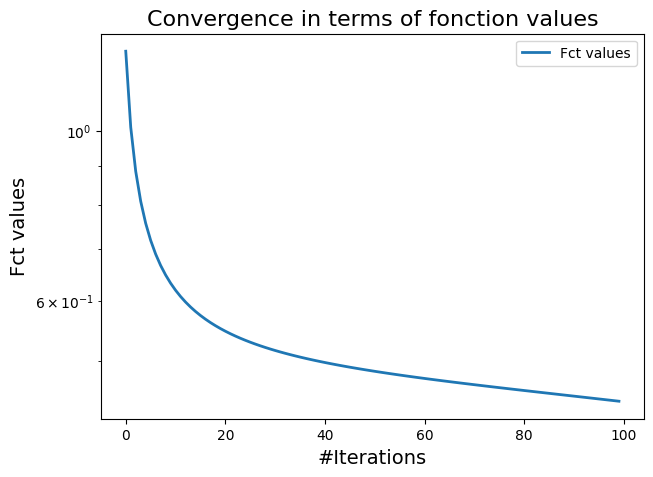

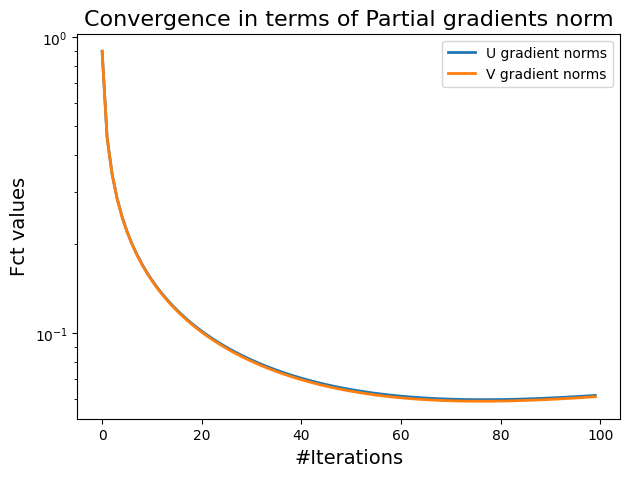

In [6]:
# Set up
np.random.seed(0)
n1 = 10
n2 = 10
r = 1

# Instantiate target
x = np.random.normal(0, 1, (n1, 1))
z = np.random.normal(0, 1, (n2, 1))
X = x.dot(z.T)

# Instantiate parameters
U = np.random.normal(0, 1, (n1, r))
V = np.random.normal(0, 1, (n2, r))

pbmatfact = MatFactPb(U=U, V=V, X=X, lambda_reg=0)

loss_vals = gd(pbmatfact, stepchoice=1 / 2, init_step=1, n_iter=100, verbose=True)
visualize(data={"Fct values": loss_vals}, title="fonction values")
visualize(
    data={
        "U gradient norms": pbmatfact.U_grad_norm_list,
        "V gradient norms": pbmatfact.V_grad_norm_list,
    },
    title="Partial gradients norm",
)